<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [382]:
# Импортируем библиотеку pandas
# Читаем файл csv
# Смотрим первые 5 строк таблицы

import pandas as pd

df = pd.read_csv('/Users/danil/Desktop/Data Science/Яндекс Практикум Data Science/3/01 Исследовательский анализ данных/07 Проектная работа/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [383]:
# смотрим информацию о файле

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [384]:
# Смотрим колличество пропущенных значений с столбцах

df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [385]:
# Смотрим список назввания населённых пунктов

df['locality_name'].sort_values().unique().tolist()

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [386]:
# Проверяем наличие минусовых значений

for i in df.columns.tolist():
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        print(i, (df[i] < 0).sum().sum())
    else: 
        continue

total_images 0
last_price 0
total_area 0
rooms 0
ceiling_height 0
floors_total 0
living_area 0
floor 0
kitchen_area 0
balcony 0
airports_nearest 0
cityCenters_nearest 0
parks_around3000 0
parks_nearest 0
ponds_around3000 0
ponds_nearest 0
days_exposition 0


### Вывод

<div class="alert alert-block alert-info">
    <ul type='circle'>

1. Есть столбцы с неправильными типами данных. Нужно поменять:

* first_day_exposition: object → datetime – так как это столбец дат 
* floors_total object: → int64 – так как занчения числовые
* is_apartment: object → bool – это булево значение
* balcony: float64 → int64 – колличество болконов может быть только целым значением
* airports_nearest: float64 → int64 – расстояние удобнее считать округляя до метров
* cityCenters_nearest: float64 → int64 – расстояние удобнее считать округляя до метров
* parks_around3000: float64 → int64 – колличество парков считается целым числом
* parks_nearest: float64 → int64 – расстояние удобнее считать округляя до метров
* ponds_around3000: float64 → int64 – колличество водоемов считается целым числом
* ponds_nearest: float64 → int64 – расстояние удобнее считать округляя до метров
* days_exposition: float64 → int64 – колличество дней считается целым числом
* last_price: float64 → int64 – округляем до целых чисел, так как копейки не считаем



2. Есть пропуски в столбцах:

* ceiling_height – 39%, придется оставить пропуски, так как их не на что заменить.
* floors_total – 0.4%, малое колличество пропусоков, но заменим на 0, чтобы не поучить ошибку при составлении колонки 'этаж квартиры'.
* living_area – 8%, не на что заменить, лучше оставить.
* is_apartment – 88%, почти все строки пропущены. Скорее всего были сделанны пропуски, так почти вся недвижимость по умолчанию квартиры. Стоить поменять значения на True
* kitchen_area – 10%, небольшое колличество пропусоков, которое не чем заменить. Не повлияет на анализ.
* balcony – 49% половина строк пропущена, скорее всего не указали из-за отсутствия балкона. Заменим на 0.
* locality_name – 0.2%, малое колличество пропусоков, которое не повлияет на анализ.
* airports_nearest – 23%, не на что заменить, придется оставить. Скорее всего проуски ставили либо те, кто живет рядом и не хотечет говорить о том, что локация шумная, либо те, кто наоборот живет далеко, и не знает рассотяния до аэропорта.
* cityCenters_nearest – 23%, не на что заменить, придется оставить.
* parks_around3000 – 23%, пропуски можно прировнять к отсутсвтию парков
* parks_nearest – 66%, многие не указали, скорее всего из-за отсутствия парка поблизости. Не удастся заменить
* ponds_around3000 – 23%, пропуски можно прировнять к отсутсвтию водоемов и заменить на 0
* ponds_nearest – 62%, пропуски можно прировнять к отсутсвтию водоемов, но заменить их не получится, так как указывается расстояние
* days_exposition – 13%, не так много пропусков, заменить их не получится, но и на статистике они сильно не скажутся

Заметна связь между расстоянием до цента, а так же парках и водоемах в радиусе 3км. 23% пропусков. Скорее всего их пропускали из-за отсутствия.


3. В cityCenters_nearest есть заглавая буква которыю нужно привести к нижнему регистру.

4. Минусовых значений нет, в этом плане данные заполнены без ошибок

5. Поделим цену на 1млн, чтобы избежать крупных чисел

## Предобработка данных

In [387]:
# Делим цену на 1млн, чтобы избавиться от крупных чисел

df['last_price'] = df['last_price'] / 1000000

In [388]:
# Приводим название столбца cityCenters_nearest к нижнему регистру

df = df.rename(columns={'cityCenters_nearest': 'citycenters_nearest'})

In [389]:
# Изменяем неправильные типы данных в коллонках:

df['is_apartment'] = df['is_apartment'].astype('bool')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
to_int = ['last_price','floors_total','balcony',
         'airports_nearest','citycenters_nearest','parks_around3000','parks_nearest','ponds_around3000',
         'ponds_nearest','days_exposition']

for column in to_int:
    df[column] = df[column].astype(int, errors='ignore')

In [390]:
# Поменяем пропуски в столбцах True и 0

df['is_apartment'] = df['is_apartment'].fillna(True)
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['floors_total'] = df['floors_total'].fillna(0)

## Расчёты и добавление результатов в таблицу

In [436]:
# Считаем и добавляем в таблицу округленную цену квадратного метра 

df['price_per_square_meter'] = df['last_price'] / df['total_area']

In [437]:
# Считаем и добавляем в таблицу день недели, месяц и год публикации объявления

df['day_of_week_of_publication'] = df['first_day_exposition'].dt.weekday #день недели
df['month_of_publication'] = df['first_day_exposition'].dt.month #месяц
df['year_of_publication'] = df['first_day_exposition'].dt.year #год 

In [393]:
# Считаем и добавляем в таблицу этаж квартиры; варианты — первый, последний, другой

df['apartment_floor'] = df['floor']
for idx, i in enumerate(df['floor']):
    if i == 1:
        df['apartment_floor'][idx] = 'первый'
    elif i == df['floors_total'][idx]:
        df['apartment_floor'][idx] = 'последний'
    else:
        df['apartment_floor'][idx] = 'другой'

/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_57827/1945603937.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['apartment_floor'][idx] = 'другой'


In [394]:
# Считаем и добавляем в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

df['rati_of_living_space_to_total_area'] = df['living_area'] / df['total_area']
df['ratio_of_kitchen_area_to_total_area'] = df['kitchen_area'] / df['total_area']
df['rati_of_living_space_to_total_area'] = df['rati_of_living_space_to_total_area'].round(2)
df['ratio_of_kitchen_area_to_total_area'] = df['ratio_of_kitchen_area_to_total_area'].round(2)

## Исследовательский анализ данных

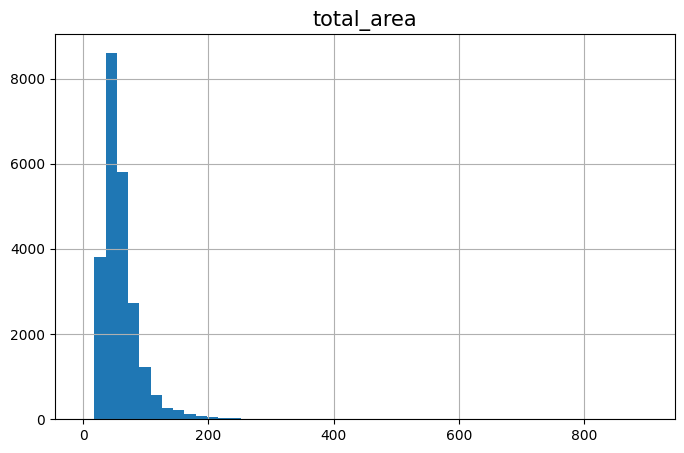

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


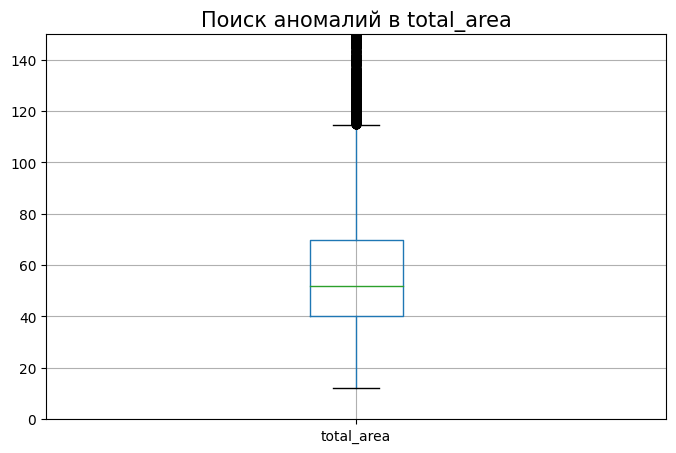

In [395]:
# Изучаем гистограмму и диаграмму размаха площади

df['total_area'].hist(bins=50, range = (0, df['total_area'].max()), figsize=(8, 5)) 
plt.title('total_area', fontsize=15)
plt.show()
print(df['total_area'].describe())

plt.figure(figsize=(8, 5))
df.boxplot(column='total_area')
plt.title(f'Поиск аномалий в total_area', fontsize=15)
plt.ylim(0, 150)
plt.show()  

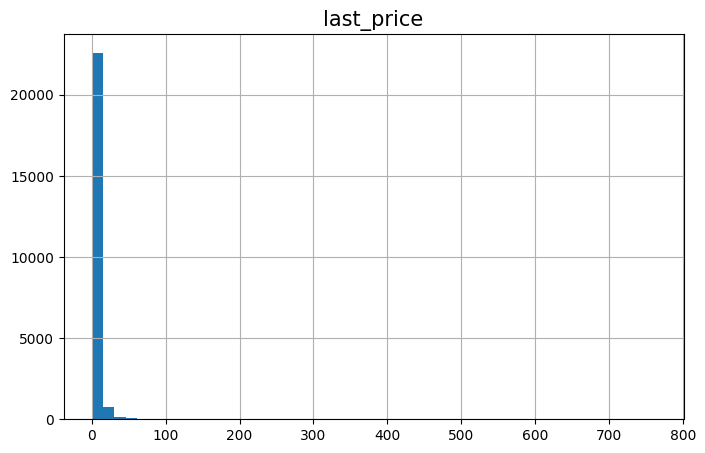

count    23699.000000
mean         6.053040
std         10.914448
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        763.000000
Name: last_price, dtype: float64


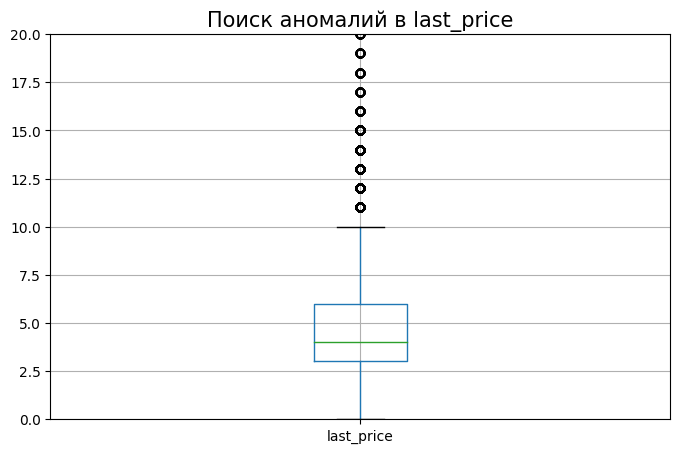

In [396]:
# Изучаем гистограмму и диаграмму размаха цены

df['last_price'].hist(bins=50, range = (0, df['last_price'].max()), figsize=(8, 5)) 
plt.title('last_price', fontsize=15)
plt.show()
print(df['last_price'].describe())

plt.figure(figsize=(8, 5))
df.boxplot(column='last_price')
plt.title(f'Поиск аномалий в last_price', fontsize=15)
plt.ylim(0, 20)
plt.show()  

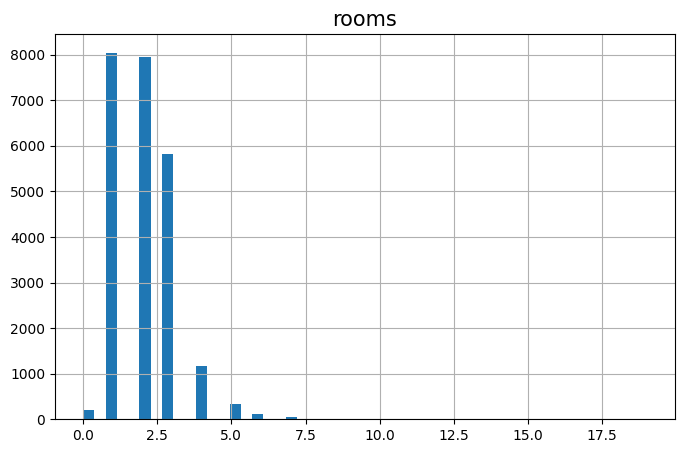

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


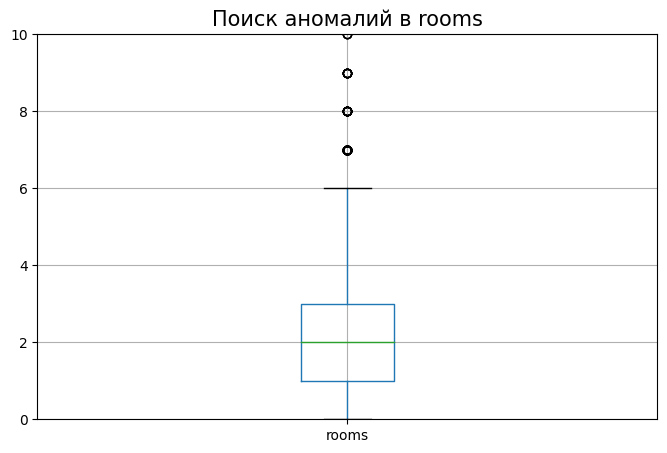

In [397]:
# Изучаем гистограмму и диаграмму числа комнат

df['rooms'].hist(bins=50, range = (0, df['rooms'].max()), figsize=(8, 5)) 
plt.title('rooms', fontsize=15)
plt.show()
print(df['rooms'].describe())

plt.figure(figsize=(8, 5))
df.boxplot(column='rooms')
plt.title(f'Поиск аномалий в rooms', fontsize=15)
plt.ylim(0, 10)
plt.show()  

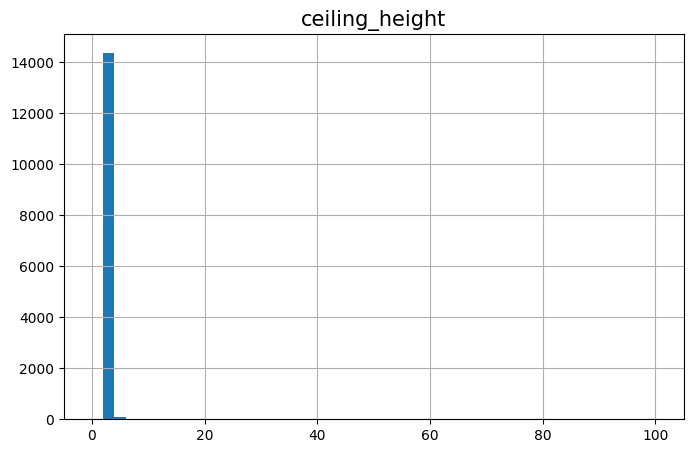

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


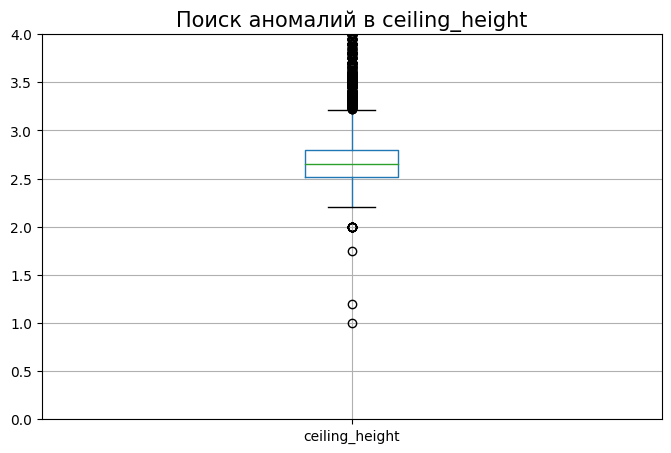

In [398]:
# Изучаем гистограмму и диаграмму размаха высоты потолков

df['ceiling_height'].hist(bins=50, range = (0, df['ceiling_height'].max()), figsize=(8, 5)) 
plt.title('ceiling_height', fontsize=15)
plt.show()
print(df['ceiling_height'].describe())

plt.figure(figsize=(8, 5))
df.boxplot(column='ceiling_height')
plt.title(f'Поиск аномалий в ceiling_height', fontsize=15)
plt.ylim(0, 4)
plt.show()  

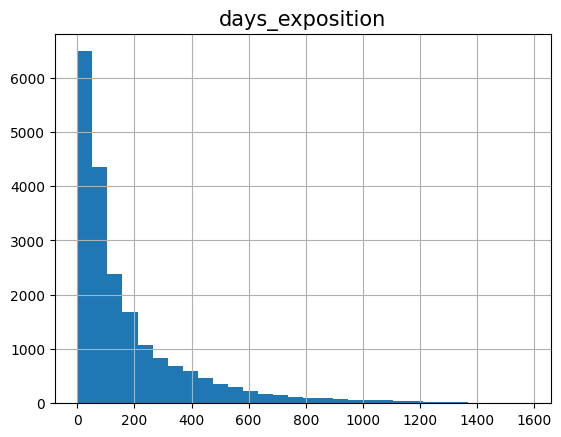

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


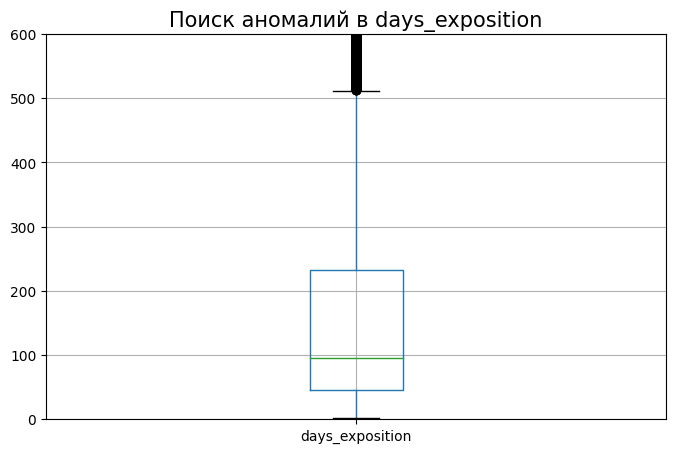

In [399]:
# Изучаем гистограмму и диаграмму размаха срока продажи

df['days_exposition'].hist(bins=30, range = (0, df['days_exposition'].max())) 
plt.title('days_exposition', fontsize=15)
plt.show()
print(df['days_exposition'].describe())

plt.figure(figsize=(8, 5))
df.boxplot(column='days_exposition')
plt.title(f'Поиск аномалий в days_exposition', fontsize=15)
plt.ylim(0, 600)
plt.show()

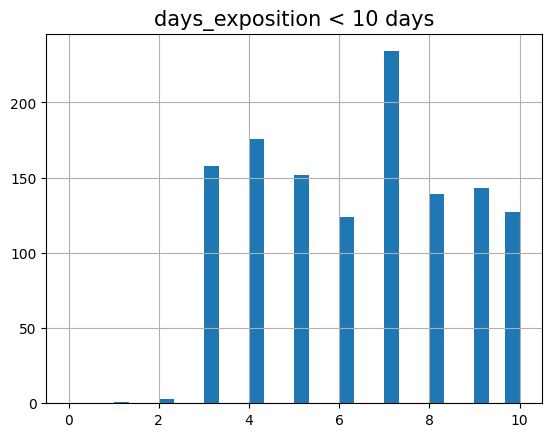

In [400]:
df['days_exposition'].hist(bins=30, range = (0, 10)) 
plt.title('days_exposition < 10 days', fontsize=15)
plt.show()

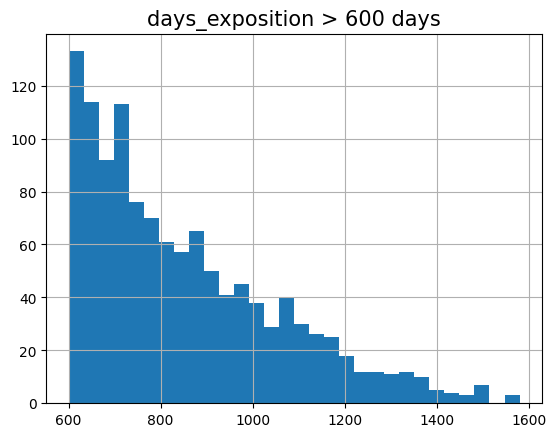

In [401]:
df['days_exposition'].hist(bins=30, range = (600, df['days_exposition'].max())) 
plt.title('days_exposition > 600 days', fontsize=15)
plt.show()

<div class="alert alert-block alert-info">
    <ul type='circle'>
        
В основном квартиры продаются за 180 дней. Продажи за 1 и 2 дня можно считать необыно быстрыми, но их единицы. Однако за 3 дня уже более 150 продаж. Но это можно объяснить очень хорошими предложениями которые постоянно мониторят покупатели ищущие конкретный объект.

Более 600 дней – необычно долго для продажи, хотя таких объектов не так много в выборке. Можно предположить, что это объекты специфические.

In [446]:
# Убераем редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

clear_df = df.query('20 <= total_area <= 120')
clear_df = clear_df.query('0.5 <= last_price <= 40')
clear_df = clear_df.query('1 <= rooms <= 6')
clear_df = clear_df.query('2.2 <= ceiling_height <= 3.5')
clear_df = clear_df.query('3 <= days_exposition <= 400')

<div class="alert alert-block alert-info">
    <ul type='circle'>

В основном продаются двухкомнатные квартиры 60 кв/м по цене 6.5 млн рублей с высотой потолка 2.8 м. Срок продажи 181 день.

Удивительно много низких потолков. Минимальная высота жилых помещений должна составлять 2,2 м, все что ниже мы срезали.

А так же много затянутых продаж (больше 400 дней).

### Изучим, зависит ли цена от
* **площади**
* **числа комнат**
* **удалённости от центра**
* **того, на каком этаже расположена квартира (первом, последнем или другом)**
* **даты размещения: дня недели, месяца и года**

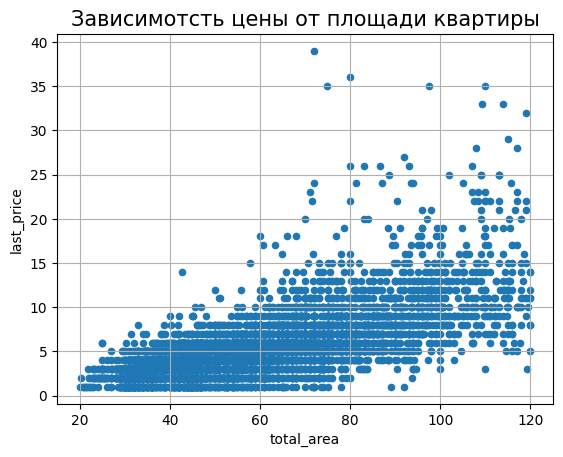

Корреляции Пирсона: 0.7089337689760801


In [447]:
# Изучаем, зависит ли цена от площади

clear_df.plot(x='total_area', y='last_price', kind='scatter', grid=True) 
plt.title('Зависимотсть цены от площади квартиры', fontsize=15)
plt.show()

corr_total_area_last_price = clear_df['total_area'].corr(clear_df['last_price'])
print(f'Корреляции Пирсона: {corr_total_area_last_price}')

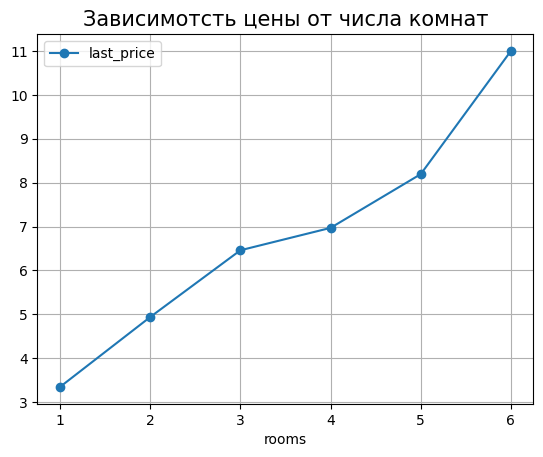

Корреляции Пирсона: 0.4099924418859696


In [466]:
# Изучаем, зависит ли цена от числа комнат

rooms = clear_df.pivot_table(index='rooms', values='last_price', aggfunc='mean')

rooms.plot(y='last_price', style='o-', grid=True)
plt.title('Зависимотсть цены от числа комнат', fontsize=15)
plt.show()

corr_clear_rooms_last_price = clear_df['rooms'].corr(clear_df['last_price'])
print(f'Корреляции Пирсона: {corr_clear_rooms_last_price}')

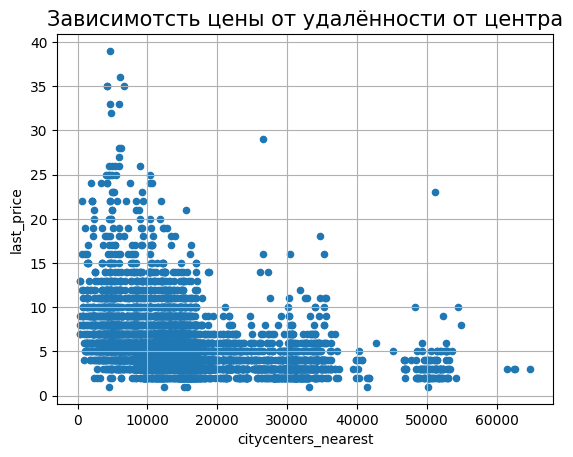

Корреляции Пирсона: -0.3203051298595952


In [449]:
# Изучаем, зависит ли цена от удалённости от центра

clear_df.plot(x='citycenters_nearest', y='last_price', kind='scatter', grid=True) 
plt.title('Зависимотсть цены от удалённости от центра', fontsize=15)
plt.show()

corr_citycenters_nearest_last_price = clear_df['citycenters_nearest'].corr(clear_df['last_price'])
print(f'Корреляции Пирсона: {corr_citycenters_nearest_last_price}')

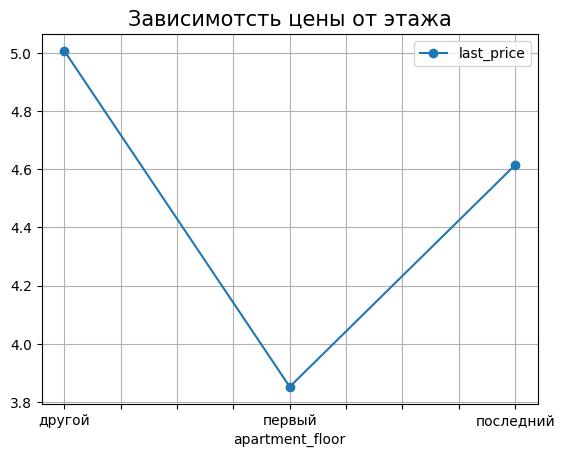

In [465]:
# Изучаем, зависит ли цена от того, 
# на каком этаже расположена квартира: первом, последнем или другом.

floor = clear_df.pivot_table(index='apartment_floor', values='last_price', aggfunc='mean')

floor.plot(y='last_price', style='o-', grid=True) 
plt.title('Зависимотсть цены от этажа', fontsize=15)
plt.show()

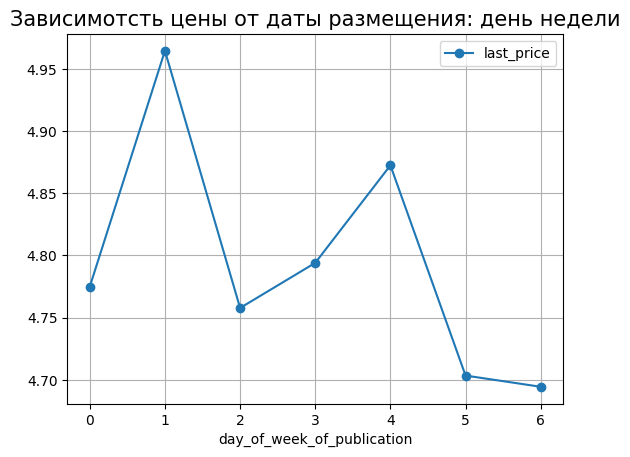

In [461]:
# Изучаем, зависит ли цена от даты размещения: дня недели

day = clear_df.pivot_table(index='day_of_week_of_publication', values='last_price')

day.plot(y='last_price', style='o-', grid=True) 
plt.title('Зависимотсть цены от даты размещения: день недели', fontsize=15)
plt.show()

# corr_day_of_week_of_publication_last_price = clear_df['day_of_week_of_publication'].corr(clear_df['last_price'])
# print(f'Корреляции Пирсона: {corr_day_of_week_of_publication_last_price}')

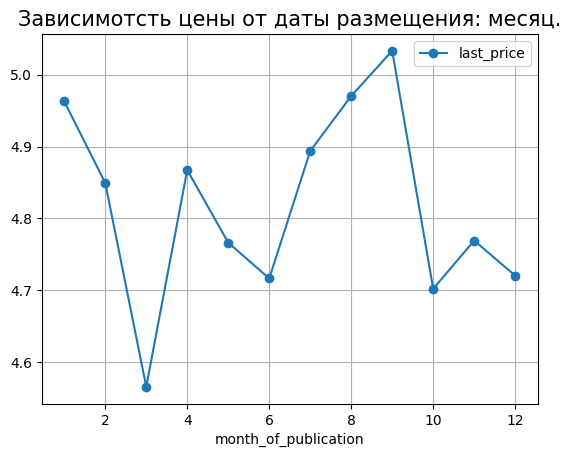

Корреляции Пирсона: -0.0003874588487405707


In [476]:
# Изучаем, зависит ли цена от даты размещения: месяца.

month = clear_df.pivot_table(index='month_of_publication', values='last_price', aggfunc='mean')

month.plot(y='last_price', style='o-', grid=True)
plt.title('Зависимотсть цены от даты размещения: месяц.', fontsize=15)
plt.show()

corr_month_of_publication_last_price = clear_df['month_of_publication'].corr(clear_df['last_price'])
print(f'Корреляции Пирсона: {corr_month_of_publication_last_price}')

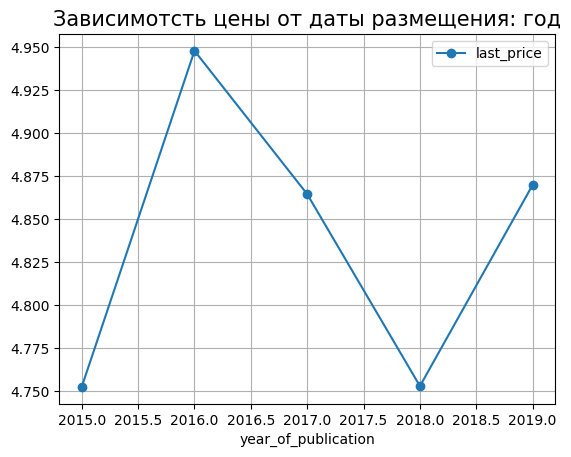

Корреляции Пирсона: -0.012260287176505217


In [475]:
# Изучаем, зависит ли цена от даты размещения: год.

year = clear_df.pivot_table(index='year_of_publication', values='last_price', aggfunc='mean')

year.plot(y='last_price', style='o-', grid=True) 
plt.title('Зависимотсть цены от даты размещения: год', fontsize=15)
plt.show()

corr_year_of_publication_last_price = clear_df['year_of_publication'].corr(clear_df['last_price'])
print(f'Корреляции Пирсона: {corr_year_of_publication_last_price}')

<div class="alert alert-block alert-info">
    <ul type='circle'>
        
Квартиры между первым и последним этажом, с большей площадью и большим числом комнат, в близи от центра стоят дороже, что вполне логично.
        
Дата размещения – самые дорогие квартиры выкладывают по вторникам и в сентябре. 2016-й год был пиком дорогих квартир.

### Выберем 10 населённых пунктов с наибольшим числом объявлений. Считаем среднюю цену квадратного метра. Выделяем населённые пункты с самой высокой и низкой стоимостью жилья.

In [477]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений

df_pivot = clear_df.pivot_table(index='locality_name', values='rati_of_living_space_to_total_area', aggfunc='count').sort_values(by='rati_of_living_space_to_total_area', ascending=False).head(10)
df_pivot

,rati_of_living_space_to_total_area
locality_name,
Санкт-Петербург,6378
Всеволожск,170
посёлок Мурино,163
посёлок Шушары,161
Колпино,156
Пушкин,144
посёлок Парголово,109
Гатчина,99
Петергоф,98


Text(0.5, 1.0, 'Цена за кв.м. в топ 10 населенных пунктах с наибольшим числом объявлений')

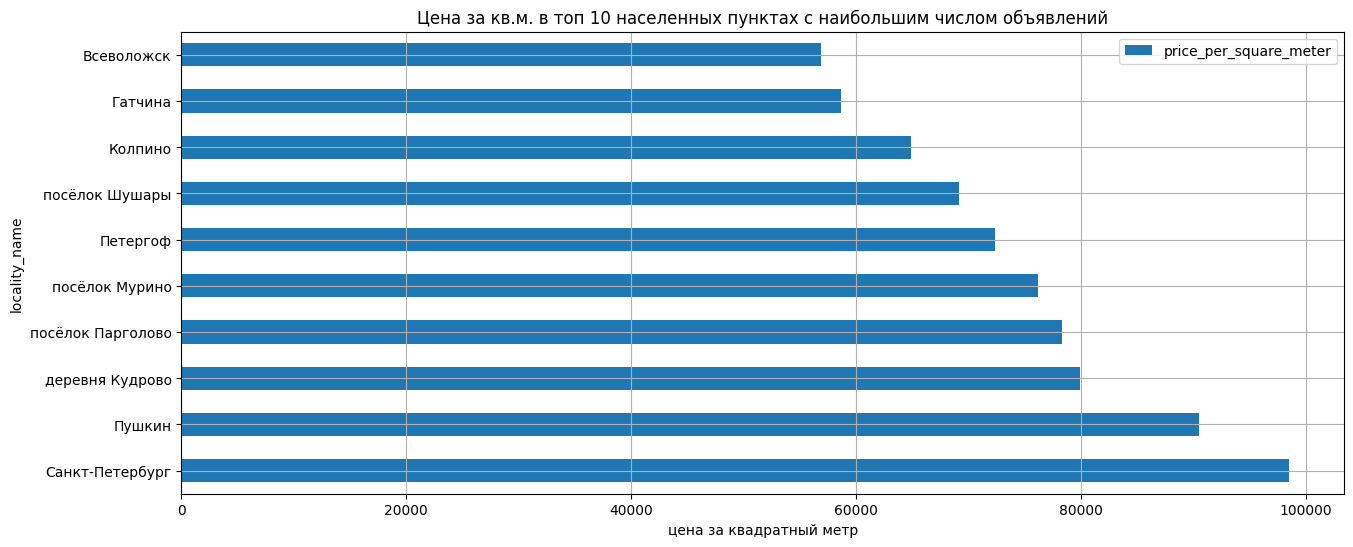

In [502]:
# Строим график стимости в этих населённых пунктах

city_list = df_pivot.index.tolist()
clear_df_city_list = clear_df.query('locality_name in @city_list')

clear_df_city_list = (
    clear_df_city_list.pivot_table(index='locality_name', values='price_per_square_meter')
    .sort_values(by='price_per_square_meter', ascending=False) * 1000000
)

clear_df_city_list.plot(y='price_per_square_meter', grid=True, figsize=(15,6), kind='barh', stacked=True)
plt.xlabel('цена за квадратный метр')
plt.title('Цена за кв.м. в топ 10 населенных пунктах с наибольшим числом объявлений')

<div class="alert alert-block alert-info">
    <ul type='circle'>

**Самая высокая стоимость жилья в Санкт-Петрбурге.** Логично, ведь это самый крупный и развитый город в нашей таблице.
        
**Самая низкая стоимость жилья в Всеволожске.** Из оставшихся 9 поселений, Всеволожск единственный не входит в Ленинградскую область, и, соответственно, находится далеко от развитого Санкт-Петербурга. Поэтому и цены самые низкие.

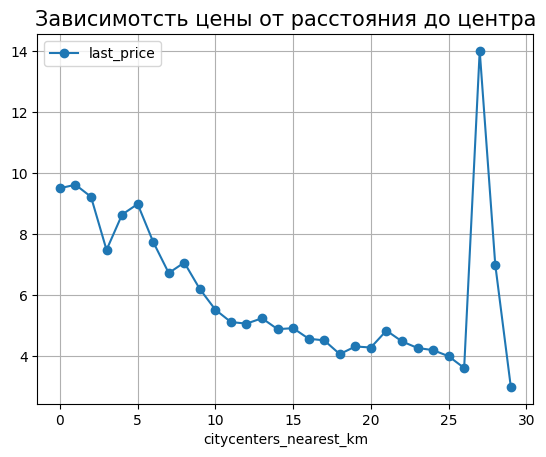

Корреляции Пирсона: -0.3213138546440114


In [534]:
# Создаем столбец расстоянием до центра в киллометрах

clear_df['citycenters_nearest_km'] = round(clear_df['citycenters_nearest'] / 1000)

every_km_pivot = (
    clear_df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='citycenters_nearest_km', values='last_price')
    .sort_values(by='citycenters_nearest_km')
    
)


every_km_pivot.plot(y='last_price', style='o-', grid=True) 
plt.title('Зависимотсть цены от расстояния до центра', fontsize=15)
plt.show()

corr_every_km = clear_df['citycenters_nearest_km'].corr(clear_df['last_price'])
print(f'Корреляции Пирсона: {corr_every_km}')

<div class="alert alert-block alert-info">
    <ul type='circle'>

По граффику видно, что не считая единичного всплечка в районе 27 км, где скорее всего находится дорогой поселок, цена начинает быстро расти по 10 км. Этот радиус будет считаться центральной зоной

### Изучим цены в центре Санкт-Петербурга

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [537]:
# Создаем срез таблицы по центру Санкт-Петербурга

center_of_spb = clear_df.query('locality_name == "Санкт-Петербург" and citycenters_nearest_km <= 10')

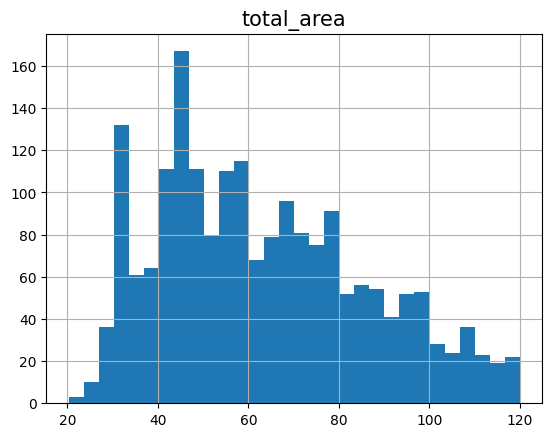

count    1950.000000
mean       63.394749
std        23.025202
min        20.300000
25%        45.000000
50%        60.000000
75%        79.000000
max       120.000000
Name: total_area, dtype: float64


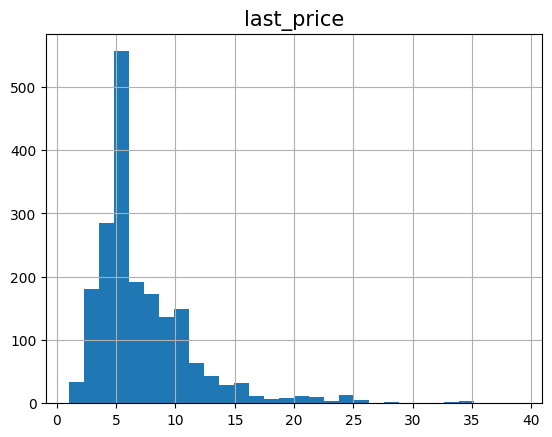

count    1950.000000
mean        7.346667
std         4.440916
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        39.000000
Name: last_price, dtype: float64


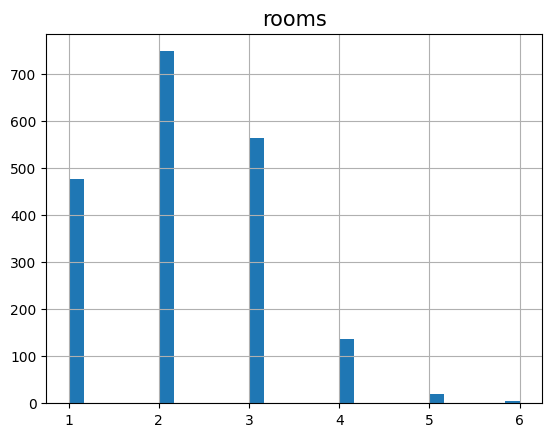

count    1950.000000
mean        2.221026
std         0.940982
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64


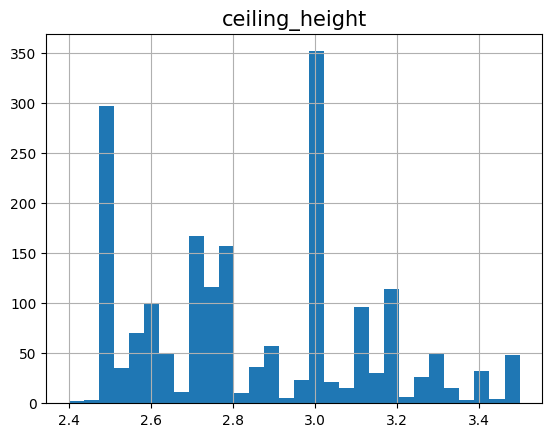

count    1950.000000
mean        2.856979
std         0.272235
min         2.400000
25%         2.600000
50%         2.800000
75%         3.000000
max         3.500000
Name: ceiling_height, dtype: float64


In [545]:
# С помощью цикла выведем гистограммы столбцов: площадь, цена, число комнат, высота потолков в центре города. 

center_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for column in center_list:
    range_max = center_of_spb[column].max()
    range_min = center_of_spb[column].min()
    center_of_spb[column].hist(bins=30, range=(range_min,range_max))
    plt.title(column, fontsize=15)
    plt.show()
    print(center_of_spb[column].describe())
    

<div class="alert alert-block alert-info">
    <ul type='circle'>
    
Большинство квартир в центре 63 кв/м, стоят 7.3 млн, имеют 2 комнаты и высоту полотков 2.9

### Ищем зависимость цены в центре Санкт-Петербурга

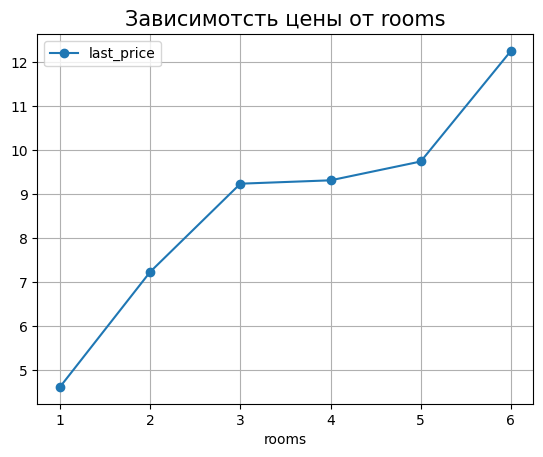

Корреляции Пирсона: 0.38290581368947624


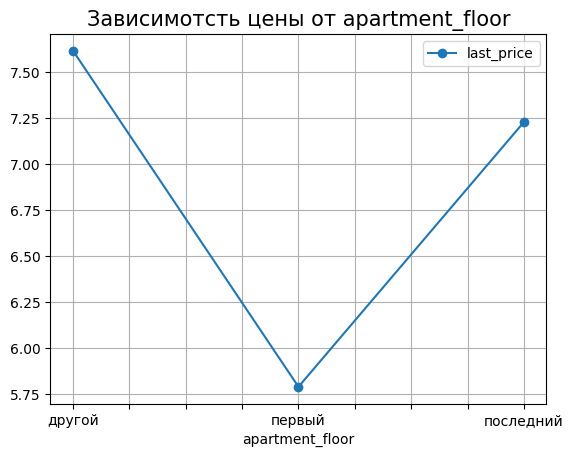

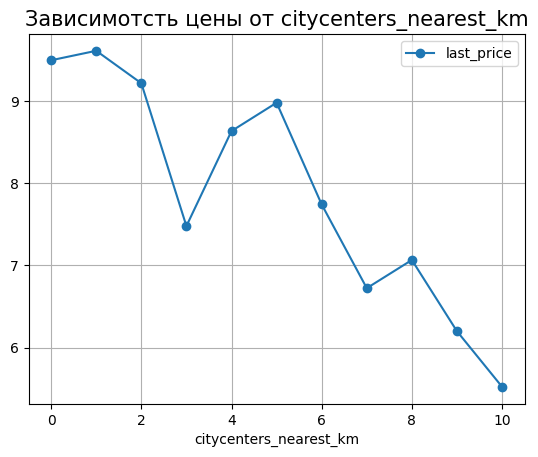

Корреляции Пирсона: -0.2690037756477087


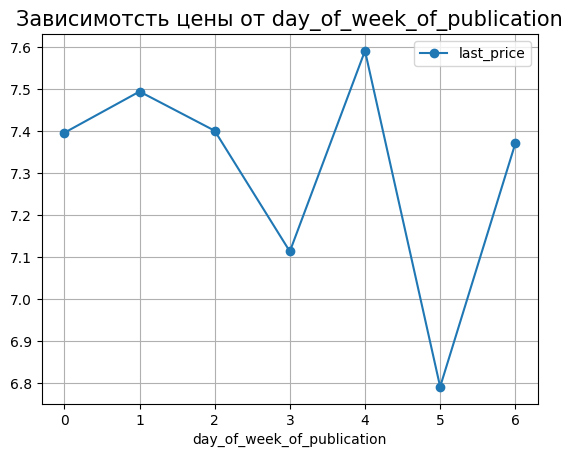

Корреляции Пирсона: -0.016751452389635667


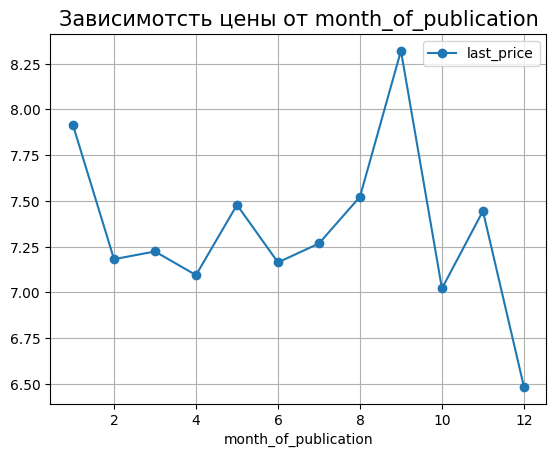

Корреляции Пирсона: -0.008836235637239198


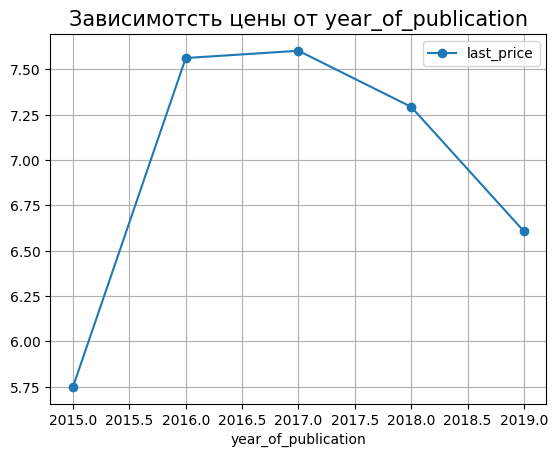

Корреляции Пирсона: -0.033086598095233274


In [556]:
# С помощью цикла выведем граффики зависимости цены 

dependencies_list = [
    'rooms', 'apartment_floor', 'citycenters_nearest_km', 'day_of_week_of_publication', 
    'month_of_publication', 'year_of_publication'
]

for column in dependencies_list:
    pivot = center_of_spb.pivot_table(index=column, values='last_price')
    pivot.plot(y='last_price', style='o-', grid=True) 
    plt.title(f'Зависимотсть цены от {column}', fontsize=15)
    plt.show()
    
    if center_of_spb[column].dtype != object:
        corr = center_of_spb[column].corr(center_of_spb['last_price'])
        print(f'Корреляции Пирсона: {corr}')

<div class="alert alert-block alert-info">
    <ul type='circle'>
        
Как и за передлом центра, квартиры между первым и последним этажом, с большей площадью и большим числом комнат, в близи от центра стоят дороже. Единственное, есть просадка цены в районе 3км, возможно на это расстонияе попали комнаты из коммуналок старого фонда.
        
Дата размещения – самые дорогие квартиры выкладывают по пятницам и в сентябре (как и не в центре). 2017-й год стал пиком дорогих квартир.

In [ ]:
Большинство квартир в центре 63 кв/м, стоят 7.3 млн, имеют 2 комнаты и высоту полотков 2.9

## Общий вывод

<div class="alert alert-block alert-info">
    <ul type='circle'>

**Квариры в центре (среднее)**

* площадь: 63 кв/м
* цена: 7.3 млн
* комнаты: 2
* высота потолков: 2.9
* лучший этаж: средний
* год самых дорогих квартир: 2017

**Квартиры по всей таблице(среднее)**

* площадь: 60 кв/м
* цена: 6.5 млн
* комнаты: 2
* высота потолков: 2.2
* лучший этаж: средний
* год самых дорогих квартир: 2016
        
        
        
Картина почти не отличается по центру Санкт-Петерубрга и в целом по всем населенным пунктам в таблице. Помимо цены выросла только высота потолков.
        
Есть корреляция зависимости цены от метрожа, колличества комнат и близости к центру.
        
**В целом никаких сюрпризов нет, все очень предстказуемо. Чем больше квартира, чем больше комнат, чем выше потолки и чем ближе к Санкт-Петерубргу находится населенный пункт, тем выше цена.**

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод